In [3]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### for the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$

### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{3 b^2 \Omega_{de}}{1+z} \,
$$

In [77]:
## using the odeint method we solve this equation
c = [0.4,1.0, 1.15, 1.5, 2.1]
b2 = [0.000001, 0.04, 0.8, 0.009,0.1] # this is b^2 

def modelz_1 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[0] + 1) + (3*y*b2[0])/(z+1)

    return dydz



def modelz_2(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[1] + 1) + (3*y*b2[1])/(z+1)

    return dydz

def modelz_3 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[2] + 1) + (3*y*b2[3])/(z+1)

    return dydz

def modelz_4(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[3] + 1) + (3*y*b2[3])/(z+1)

    return dydz

def modelz_5 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[4] + 1) + (3*y*b2[4])/(z+1)

    return dydz



In [82]:
#model = []
#for i in c:
 #     for j in b2:
  #      def modelz(y,z):
        #  dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/i + 1) + (3*y*j)/(z+1)
         # return dydz
   #     model.append(modelz)
      
# initial condition
#y0 = 0.7
# redshift  points
#z = np.linspace(0.0000001,3)


#solution_ode = [odeint(model[5],y0,z) ,odeint(model[10],y0,z),odeint(model[15],y0,z),odeint(model[20],y0,z),odeint(model[25],y0,z)]


#plt.plot(z,solution_ode[0],color='blue',label='$c=0.04 & b^2 =0.000001$')
#plt.plot(z,odeint(model[1],y0,z),color='red')
#plt.plot(z,solution_ode[1],color='red',label='$c=1 & b^2 =0.04$')
#plt.plot(z,solution_ode[2],color='green',label='$c=1.15 & b^2 =0.1$')
#plt.plot(z,solution_ode[3],color='violet',label='$c=1.5 & b^2 =0.009$')
#plt.plot(z,solution_ode[4],color='cyan',label='$c=2.1 & b^2 =0.1$')
#plt.xlabel('z')
#plt.legend()
#plt.title('Holographic dark energy density parameter')
#plt.ylabel('$\Omega_{de}$')
#plt.grid()  


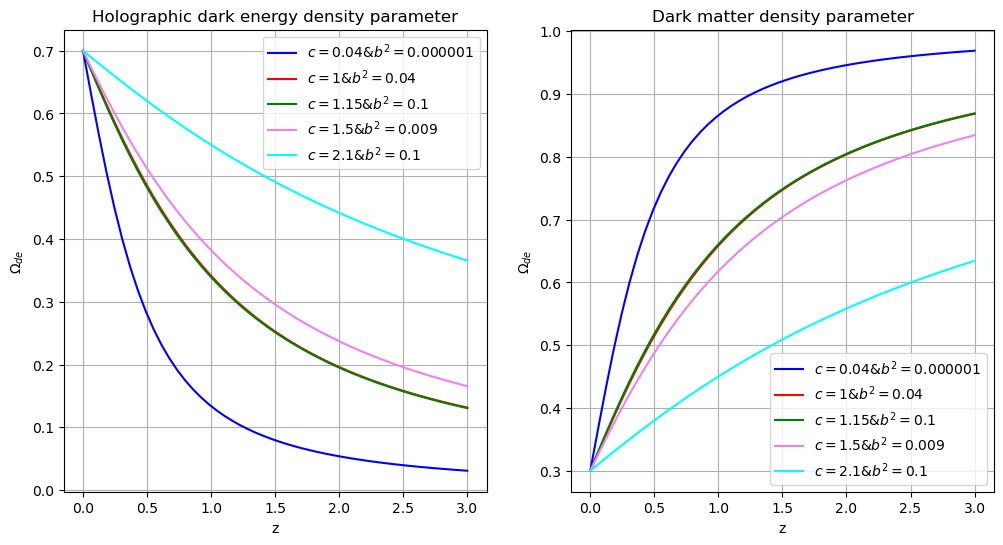

In [105]:
# initial condition
y0 = 0.7
# redshift  points
z = np.linspace(0.0000001,3)



solutions = [odeint(modelz_1,y0,z) ,odeint(modelz_2,y0,z),odeint(modelz_3,y0,z),odeint(modelz_4,y0,z),odeint(modelz_5,y0,z)]


O_dm = [1-solutions[0],1-solutions[1],1-solutions[2],1-solutions[3],1-solutions[4]]





plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(z,solutions[0],color='blue',label='$c=0.04 & b^2 =0.000001$')
plt.plot(z,solutions[1],color='red',label='$c=1 & b^2 =0.04$')
plt.plot(z,solutions[2],color='green',label='$c=1.15 & b^2 =0.1$')
plt.plot(z,solutions[3],color='violet',label='$c=1.5 & b^2 =0.009$')
plt.plot(z,solutions[4],color='cyan',label='$c=2.1 & b^2 =0.1$')
plt.xlabel('z')
plt.legend()
plt.title('Holographic dark energy density parameter')
plt.ylabel('$\Omega_{de}$')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(z,O_dm[0],color='blue',label='$c=0.04 & b^2 =0.000001$')
plt.plot(z,O_dm[1],color='red',label='$c=1 & b^2 =0.04$')
plt.plot(z,O_dm[2],color='green',label='$c=1.15 & b^2 =0.1$')
plt.plot(z,O_dm[3],color='violet',label='$c=1.5 & b^2 =0.009$')
plt.plot(z,O_dm[4],color='cyan',label='$c=2.1 & b^2 =0.1$')
plt.xlabel('z')
plt.legend()
plt.title('Dark matter density parameter')
plt.ylabel('$\Omega_{de}$')
plt.grid()



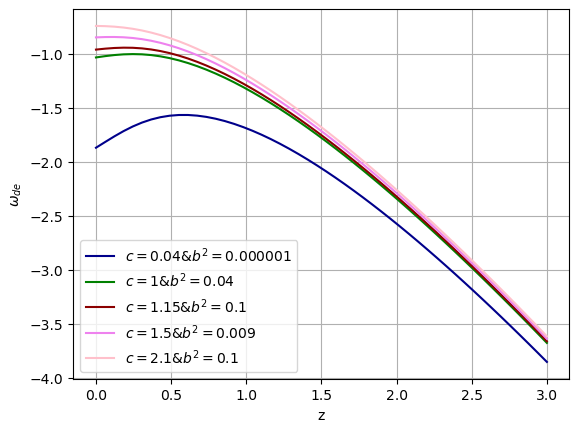

In [106]:
eos = []
for i in solutions:
    for j in c:
        for k in b2:
         omega = -(1/3)*(1+ (2*np.sqrt(i))/(j)) - k/i
        eos.append(omega)
        
plt.plot(z,eos[0],color='darkblue',label='$c=0.04 & b^2 =0.000001$')
plt.plot(z,eos[1],color='green',label='$c=1 & b^2 =0.04$')
plt.plot(z,eos[2],color='darkred',label='$c=1.15 & b^2 =0.1$')
plt.plot(z,eos[3],color='violet',label='$c=1.5 & b^2 =0.009$')
plt.plot(z,eos[4],color='pink',label='$c=2.1 & b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("z")
plt.grid()



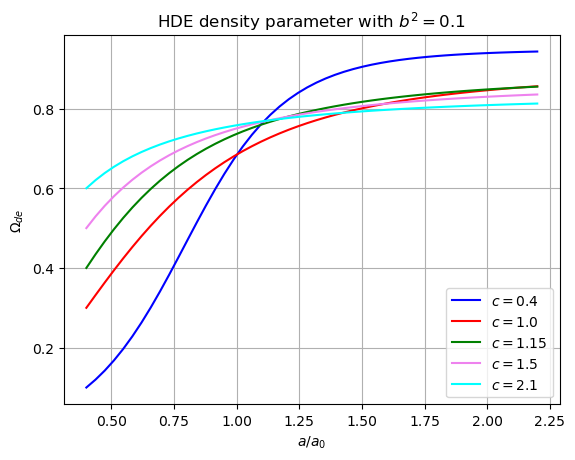

In [126]:
def modela_1 (y,a):
    dyda = -(1/a)*(y*(y-1))*((2*(np.sqrt(y)))/c[0] + 1) - (3*y*b2[4])*(1/a)
    return dyda

def modela_2 (y,a):
    dyda = -(1/a)*(y*(y-1))*((2*(np.sqrt(y)))/c[1] + 1) - (3*y*b2[4])*(1/a)
    return dyda

def modela_3 (y,a):
    dyda = -(1/a)*(y*(y-1))*((2*(np.sqrt(y)))/c[2] + 1) - (3*y*b2[4])*(1/a)
    return dyda

def modela_4 (y,a):
    dyda = -(1/a)*(y*(y-1))*((2*(np.sqrt(y)))/c[3] + 1) - (3*y*b2[4])*(1/a)
    return dyda

def modela_5 (y,a):
    dyda = -(1/a)*(y*(y-1))*((2*(np.sqrt(y)))/c[4] + 1) - (3*y*b2[4])*(1/a)
    return dyda


y00 = 0.1
y01 = 0.3
y02 = 0.4
y03 = 0.5
y04 = 0.6
a1 = np.linspace(0.4,2.2)


solutionsa = [odeint(modela_1,y00,a1) ,odeint(modela_2,y01,a1),odeint(modela_3,y02,a1),odeint(modela_4,y03,a1),odeint(modela_5,y04,a1)]

plt.plot(a1,solutionsa[0],color='blue',label='$c=0.4$')
plt.plot(a1,solutionsa[1],color='red',label='$c=1.0$')
plt.plot(a1,solutionsa[2],color='green',label='$c=1.15$')
plt.plot(a1,solutionsa[3],color='violet',label='$c=1.5$')
plt.plot(a1,solutionsa[4],color='cyan',label='$c=2.1$')
plt.xlabel('$a/a_0$')
plt.legend()
plt.title('HDE density parameter with $b^2 =0.1$')
plt.ylabel('$\Omega_{de}$')
plt.grid()
